# Decision Trees and Different Metrics

In this lecture we are going to look at <i>decision tree models</i>. We will learn how to train and use such models, and how to visualize the decision trees. When we are doing binary classification, we will also introduce precision and recall.

<b>Functions and attributes in this lecture: </b>
- `sklearn.tree` - Submodule for dealing with trees
 - `DecisionTreeClassifier` - Decision tree model for classification problems
 - `DecisionTreeRegressor` - Decision tree model for regression problems
 - `plot_tree` - Use this for plotting the tree
- `sklearn.metrics` - Submodule containing metrics
 - `precision_score` - Calculates the precision score
 - `recall_score` - Calculates the recall score

In [76]:
# Non-sklearn packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [40]:
# Importing the breast cancer dataset
from sklearn.datasets import load_breast_cancer

# Geting the data and targets
X = load_breast_cancer()['data']
y = load_breast_cancer()['target']

# Divide into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Printing out description of the dataset
print(load_breast_cancer()['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## Decision Tree Model

In [41]:
# Importing the decision tree classifier model
from sklearn.tree import DecisionTreeClassifier
# If our problem is a regression problem we instead write:
# from sklearn.tree import DecisionTreeRegressor

In [53]:
# Initializing a decision tree classifier
tree_model = DecisionTreeClassifier(random_state=42, max_leaf_nodes = 6, max_depth= 3)

In [54]:
# Fitting the model
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=6, random_state=42)

In [55]:
# Importing the plott tree function
from sklearn.tree import plot_tree

[]

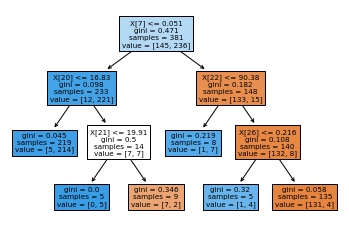

In [77]:
# Plot the tree
plot_tree(tree_model, filled=True)
plt.plot()

In [81]:
# Calculate the accuracy score
y_pred = tree_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.9574468085106383

## Precision and recall

In [67]:
# Find false positives
y_pred[y_pred != y_test].sum()

2

In [68]:
# Find false negatives
(y_pred[y_pred != y_test] == 0).sum()

6

In [63]:
# Import the precision and recall metrics
from sklearn.metrics import precision_score, recall_score

In [69]:
# Finding the precision score
precision_score(y_test, y_pred)

0.9829059829059829

In [70]:
# Finding the recall score
recall_score(y_test, y_pred)

0.9504132231404959

In [111]:
# Weight the different classes differently
tree_model_precision = DecisionTreeClassifier(random_state=42, max_depth= 3,
                                              class_weight={0:0.3, 1:0.7})

In [112]:
# Fit the weighted model
tree_model_precision.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.7, 1: 0.3}, max_depth=3,
                       random_state=42)

In [113]:
# Score the weighted model
y_pred = tree_model_precision.predict(X_test)
accuracy_score(y_pred, y_test)

0.9414893617021277

In [114]:
# False positives
y_pred[y_pred != y_test].sum()

2

In [115]:
# False negatives
(y_pred[y_pred != y_test] == 0).sum()

9

In [116]:
# Finding the precision score
precision_score(y_test, y_pred)

0.9824561403508771

In [117]:
# Finding the recall score
recall_score(y_test, y_pred)

0.9256198347107438